0 1
10 2
50 3
100 4


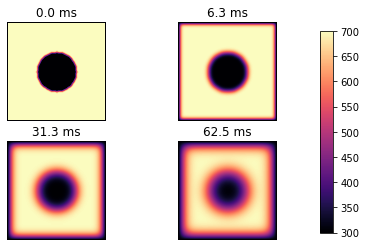

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 > r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('magma'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

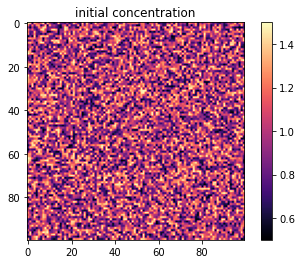

In [3]:
import numpy as np
#from numpy.random import *
import matplotlib.pyplot as plt

nx = 100 
ny = nx 
dx, dy = 0.5, 0.5 
c0 = 0.5
nsteps = 600# total number of time-steps


c = np.zeros((nx,ny)) # zero-clear
c_new = np.zeros((nx,ny)) # zero clear

c = c0 + np.random.rand(nx, ny)#*0.01


plt.imshow(c, cmap='magma')
plt.title('initial concentration')
plt.colorbar()
plt.show()

0 1
10 2
50 3
100 4


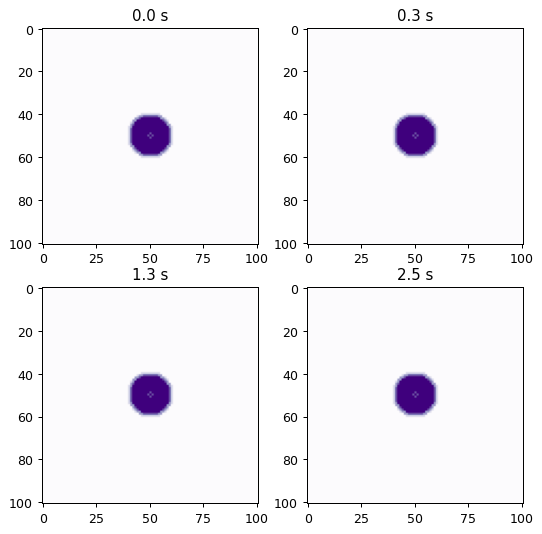

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# constante difusao
D = 1

# parametros da caixa
nx = 101
ny = 101
dx = 0.1
dy = 0.1

# passo de tempo
dt = dx ** 2 * dy ** 2 / (2 * D * (dx ** 2 + dy ** 2))
#dt = (dx * dy / D) * 0.1

# concentracao inicial e concentracao final 
u0 = np.zeros((nx, ny))
u = np.zeros((nx, ny))

#u = u0 + np.random.rand(nx,ny)*0.01

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, dr, x, y = 0, 1, 5, 5
ri2, ro2 = r**2, (r+dr)**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-x)**2 + (j*dy-y)**2
        if ri2 < p2 < ro2:
            u0[i,j] = 2

def do_timestep(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx ** 2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy ** 2 )

    #u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101


# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize=(8,7),dpi=90)
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u, cmap='Purples')
        #plt.xlabel('Lx')
        #plt.ylabel('Ly')
        ax.set_title('{:.1f} s'.format(m*dt*10))
fig.subplots_adjust(right=.8)
plt.show()

0 1
10 2
50 3
100 4


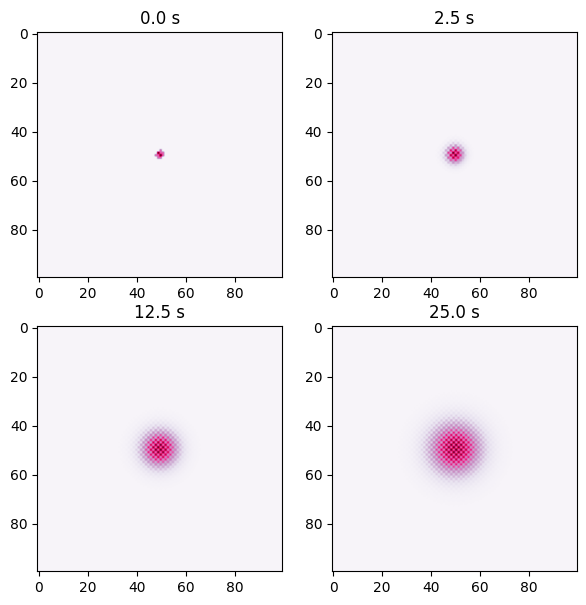

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lx = Ly = 10.

dx = dy = 0.1

D = 1.

Tcool, Thot = 10, 100

nx, ny = int(Lx/dx), int(Ly/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = np.zeros((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 0.1, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 201

# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize=(8, 7))
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u0, cmap=plt.get_cmap('PuRd'))
        ax.set_title('{:.1f} s'.format(m*dt*100))
fig.subplots_adjust(right=.8)
plt.show()

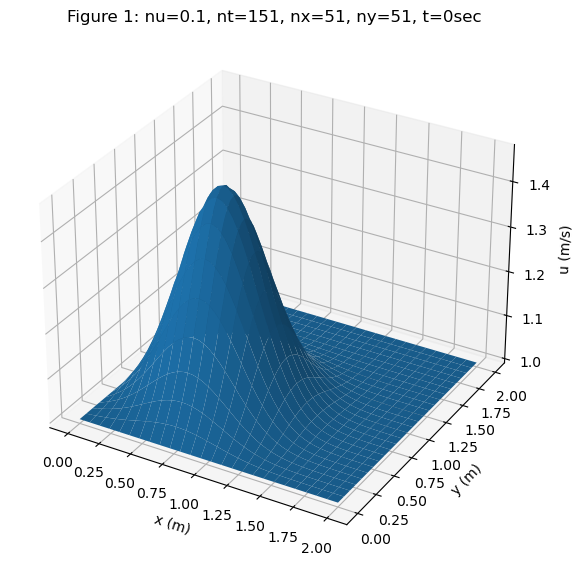

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def diffusion(nt, nx, ny, tmax, xmax, ymax, nu):
    # Increments
    dt = tmax/(nt-1)
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    
    # Initialise data structures
    u = np.zeros(((nx,ny,nt)))
    v = np.zeros(((nx,ny,nt)))
    x = np.zeros(nx)
    y = np.zeros(ny)
    
    # Boundary conditions
    u[0,:,:] = u[nx-1,:,:] = u[:,0,:] = u[:,ny-1,:] = 1
    v[0,:,:] = v[nx-1,:,:] = v[:,0,:] = v[:,ny-1,:] = 1

    # Initial conditions
    u[:,:,:] = v[:,:,:] = 1
    u[int((nx-1)/4):int((nx-1)/2),int((ny-1)/4):int((ny-1)/2),0] = 2
    v[int((nx-1)/4):int((nx-1)/2),int((ny-1)/4):int((ny-1)/2),0] = 2

    # Loop
    for n in range(0,nt-1):
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                u[i,j,n+1] = ( u[i,j,n]+dt*nu*( ( u[i-1,j,n]-2*u[i,j,n]+u[i+1,j,n] ) /dx**2 +
                                          ( u[i,j-1,n]-2*u[i,j,n]+u[i,j+1,n] ) /dy**2 ) )
                v[i,j,n+1] = ( v[i,j,n]+dt*nu*( ( v[i-1,j,n]-2*v[i,j,n]+v[i+1,j,n] ) /dx**2 +
                                          ( v[i,j-1,n]-2*v[i,j,n]+v[i,j+1,n] ) /dy**2 ) )

    # X Loop
    for i in range(0,nx):
        x[i] = i*dx

    # Y Loop
    for j in range(0,ny):
        y[j] = j*dy

    return u, v, x, y



def plot_3D(u,x,y,time,title,label):
    fig=plt.figure(figsize=(11,7),dpi=100)
    ax=fig.add_subplot(projection='3d')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel(label)
    X,Y=np.meshgrid(x,y)
    surf=ax.plot_surface(X,Y,u[:,:,time],rstride=2,cstride=2)
    plt.title(title)
    plt.show()

    
u,v,x,y = diffusion(151, 51, 51, 0.5, 2.0, 2.0, 0.1)
plot_3D(u,x,y,100,'Figure 1: nu=0.1, nt=151, nx=51, ny=51, t=0sec','u (m/s)')

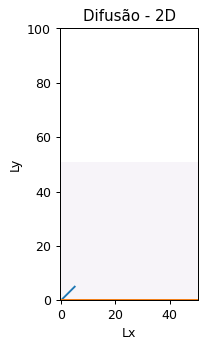

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def difusao(nt,nx,ny,D):
    u0 = np.zeros((nx,ny))
    u = np.zeros((nx, ny))
    x = np.zeros(nx)
    y = np.zeros(nx)
    
    # condicoes de contorno
    u[0:] = u[nx-1:] = 1
    u[0:] = u[ny-1:] = 1
  
    # condicoes iniciais
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = u0[i,j] + D * dt * u0[i+1,j] - 2*u0[i,j] + u0[i-1,j] / (dx ** 2)
            + u0[i,j+1] - 2*u0[i,j] + u0[i,j-1]/(dy ** 2)

    for i in range(1,nx):
        x[i] = i*dx

    for j in range(1,ny):
        y[j] = j*dy

    u = np.copy(u0)
    return u, u0, x, y


def plot_difusao(u,x,y,time,title):
    fig = plt.figure(figsize=(6,4),dpi=90)
    ax = fig.add_subplot()
    im = ax.imshow(u,cmap='PuRd')
    plt.plot(x,y,u)
    plt.xlabel('Lx')
    plt.ylabel('Ly')
    plt.ylim([0,100])
    plt.title(title)
    plt.show()
    
    
#D = 1
#nx = 101
#ny = 101
dx = 0.1
dy = 0.1
#nt = 1001
dt = 0.1    

u,u0,x,y = difusao(151,51,51,0.1)
plot_difusao(u,x,y,100,'Difusão - 2D')

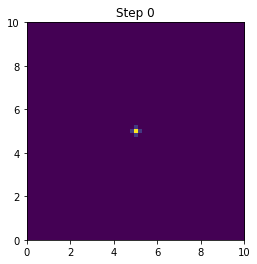

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def diffuse(conc, D, dt, dx, dy):
    nx, ny = conc.shape
    conc_new = conc.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            conc_new[i, j] = conc[i, j] + D * dt / dx**2 * (conc[i+1, j] - 2 * conc[i, j] + conc[i-1, j]) \
                                            + D * dt / dy**2 * (conc[i, j+1] - 2 * conc[i, j] + conc[i, j-1])
    return conc_new

def simulate_diffusion(nx, ny, D, T, Lx, Ly):
    dx = Lx / (nx-1)
    dy = Ly / (ny-1)
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)
    conc = np.zeros((nx, ny))
    conc[nx//2, ny//2] = 1
    dt = 0.1 * dx**2 / D
    N_steps = int(T / dt)
    fig, ax = plt.subplots()
    for i_step in range(N_steps):
        conc = diffuse(conc, D, dt, dx, dy)
        if i_step % 10 == 0:
            ax.cla()
            ax.imshow(conc, extent=[0, Lx, 0, Ly], origin='lower')
            ax.set_title("Step {}".format(i_step))
            plt.pause(0.1)
    plt.show()

simulate_diffusion(51, 51, 1, 100, 10, 10)


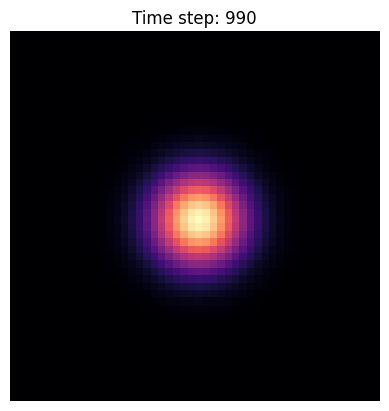

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def diffusion_model(nx, ny, dx, dy, dt, total_time, D):
    # Initialize the concentration matrix
    conc = np.ones((nx, ny))
    conc[int(nx/2), int(ny/2)] = 2

    # Calculate number of time steps
    nt = int(total_time / dt)

    # Time loop
    for i in range(nt):
        # Copy the current concentration to update the values
        conc_new = np.copy(conc)
        # Loop over the grid
        for x in range(1, nx-1):
            for y in range(1, ny-1):
                # Calculate the diffusion
                conc_new[x, y] = conc[x, y] + D * dt * (
                    (conc[x+1, y] - 2 * conc[x, y] + conc[x-1, y]) / dx**2 + 
                    (conc[x, y+1] - 2 * conc[x, y] + conc[x, y-1]) / dy**2
                )
        # Update the concentration
        conc = np.copy(conc_new)
        
        # Plot the concentration every 10th time step
        if i % 10 == 0:
            plt.imshow(conc, cmap='magma')
            plt.axis('off')
            plt.title('Time step: {}'.format(i))
            #plt.savefig('diffusion_step_{}.png'.format(i))

# Define grid parameters
nx = 50
ny = 50
dx = 1
dy = 1
dt = 0.1
total_time = 100
D = 0.1

# Run the diffusion model
diffusion_model(nx, ny, dx, dy, dt, total_time, D)